# CS 279 Project Notebook 

This notebook contains the machine learning part of the experiment where we build, train, and test the model. Tensorflow was used. Thus, the documentation was referenced frequently. 

## Imports and processing data 

In [2]:
import keras   
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pickle

# load in labels and samples 
data_file = open('subset.pkl', 'rb')

In [4]:
data_set = pickle.load(data_file)

In [5]:
import numpy as np

unzipped_list = list(zip(*data_set))
X = list(unzipped_list[0])
y = list(unzipped_list[1])
X = np.array(X)
y = np.array(y)

In [6]:
# split data into train and test 
idx = round(len(X)*.9)
X_train = X[:idx]
X_test = X[idx:]
y_train = y[:idx]
y_test = y[idx:]

## Initialize and train model 

In [7]:
import tensorflow as tf
import keras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(512, 512, 3)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(28, activation='sigmoid')
])

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=250)

Epoch 1/250
3/3 [==============================] - 2s 90ms/step - loss: 1.2640 - accuracy: 0.2289
Epoch 2/250
3/3 [==============================] - 0s 95ms/step - loss: 0.7158 - accuracy: 0.0241
Epoch 3/250
3/3 [==============================] - 0s 83ms/step - loss: 0.4420 - accuracy: 0.3133
Epoch 4/250
3/3 [==============================] - 0s 86ms/step - loss: 0.4272 - accuracy: 0.2771
Epoch 5/250
3/3 [==============================] - 0s 80ms/step - loss: 0.3686 - accuracy: 0.1446
Epoch 6/250
3/3 [==============================] - 0s 92ms/step - loss: 0.3067 - accuracy: 0.4699
Epoch 7/250
3/3 [==============================] - 0s 83ms/step - loss: 0.2491 - accuracy: 0.3133
Epoch 8/250
3/3 [==============================] - 0s 86ms/step - loss: 0.1797 - accuracy: 0.4458
Epoch 9/250
3/3 [==============================] - 0s 87ms/step - loss: 0.1447 - accuracy: 0.5301
Epoch 10/250
3/3 [==============================] - 0s 81ms/step - loss: 0.1175 - accuracy: 0.4819
Epoch 11/250
3/3 [=

In [11]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


In [12]:
# imports 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

# function to plot training given history dictionary 
def plot_training(history_dict):
	"""
	Plots the training accuracy and loss graphs for a Keras model (validation graphs not included). 
	Parameters:
		- history_dict: a dictionary of "history" object from Keras 
	"""
	# plot training accuracy graph 
	plt.plot(history_dict['accuracy'])
	plt.title('Training Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

	# plot training loss graph 
	plt.plot(history_dict['loss'])
	plt.title('Training Loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

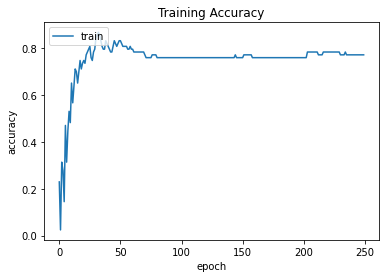

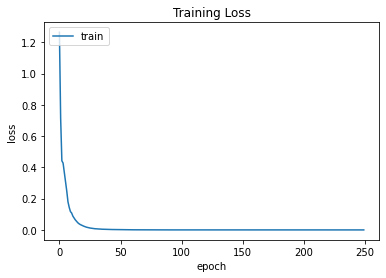

In [13]:
plot_training(history_dict)

## Evaluate the model on the test set 

In [22]:
predictions = model.predict(X_test)

Round to 0 or 1 to make the predictions discrete (like how the ground truths are). 

In [23]:
predictions_temp = []
for elem in predictions:
  curr_preds = []
  curr_pred = elem
  for number in curr_pred:
    if number > 0.5:
      curr_preds.append(1)
    else:
      curr_preds.append(0)
  predictions_temp.append(curr_preds)
predictions_multilabel = predictions_temp

In [25]:
# proportional accuracy
counter = 0;  
aggregate_ctr = 0;
for j in range(len(predictions_multilabel)):
  prediction_set = predictions_multilabel[j]; 
  for i in range(len(prediction_set)):
    if prediction_set[i] == y_test[j][i]:
      counter += 1
    aggregate_ctr += 1

In [29]:
print("Proportional accuracy: ", counter/aggregate_ctr * 100, "percent")

Proportional accuracy:  94.04761904761905 percent


The following generates f1, precision, and recall: 

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_multilabel))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
test_loss, test_accuracy = model.evaluate(X_test,  y_test, verbose=2)
print('Exact match test accuracy:', test_accuracy)

1/1 - 0s - loss: 0.5995 - accuracy: 0.2222 - 35ms/epoch - 35ms/step
Exact match test accuracy: 0.2222222238779068
